In [2]:
# Description: This notebook combines all the results and visualizes them.

# Load libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

## Actual Accuracy

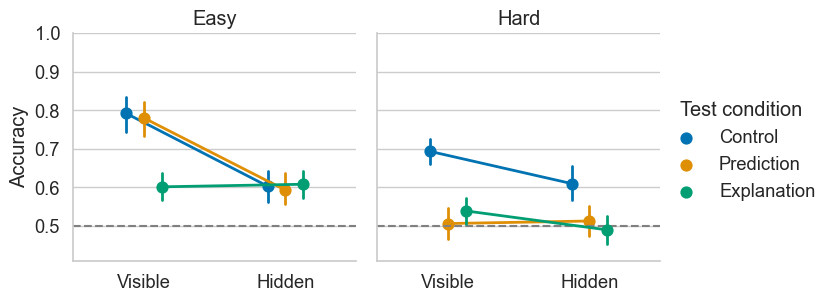

In [5]:
# Load data
trials_PEC_path = '../data/test_PEC.csv'
trials_PEC = pd.read_csv(trials_PEC_path)

# aggregate accuracy data for each participant and each trial type
aggregated_accuracy = trials_PEC.groupby(['participant_id', 'learning_condition', 'fsm_type', 'test_condition', 'trial_type'])['response_correct'].mean().reset_index()

# rename easy to Easy and hard to Hard
aggregated_accuracy['fsm_type'] = aggregated_accuracy['fsm_type'].replace({'easy': 'Easy', 'hard': 'Hard'})

# rename test_condition 
aggregated_accuracy['test_condition'] = aggregated_accuracy['test_condition'].replace({'prediction': 'Prediction', 'control': 'Control', 'explanation': 'Explanation'})
aggregated_accuracy['trial_type'] = aggregated_accuracy['trial_type'].replace({'visible': 'Visible', 'hidden': 'Hidden'})

# convert trial_type and fsm_type to categorical variable with ordered levels
aggregated_accuracy['trial_type'] = pd.Categorical(aggregated_accuracy['trial_type'], categories=['Visible', 'Hidden'], ordered=True)
aggregated_accuracy['fsm_type'] = pd.Categorical(aggregated_accuracy['fsm_type'], categories=['Easy', 'Hard'], ordered=True)

# Plot mean accuracy and 95%CI
sns.set(style="whitegrid", font_scale=1.2) # set style and font size for all plots

g = sns.catplot(x="trial_type", y="response_correct", hue="test_condition", col="fsm_type", data=aggregated_accuracy, \
                kind="point", dodge=0.25, join=True, errorbar = ("ci", 95), palette="colorblind", height=3.5, aspect=1, legend=True)

# make line thiner
for ax in g.axes.flat:
    for line in ax.lines:
        line.set_linewidth(2)

# add dashed line at 0.5
for ax in g.axes.flat:
    ax.axhline(0.5, ls='--', color='gray')

g._legend.set_title('Test condition') # add legend title
g.set_titles("{col_name}") # add column titles
g.set_axis_labels("", "Accuracy") # add y-axis label
g.set(ylim=(0.41, 1)) # y axis limits 0.4 to 1


## Mental Mode Accuracy

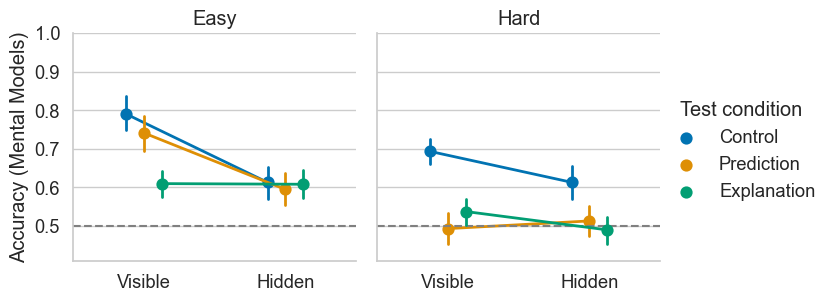

In [11]:
# Load data
trials_PEC_path = '../outputs/all_trials_with_Ri.csv'
trials_PEC = pd.read_csv(trials_PEC_path)

# aggregate accuracy data for each participant and each trial type
aggregated_accuracy = trials_PEC.groupby(['participant_id', 'learning_condition', 'fsm_type', 'test_condition', 'trial_type'])['response_correct_mm'].mean().reset_index()

# rename easy to Easy and hard to Hard
aggregated_accuracy['fsm_type'] = aggregated_accuracy['fsm_type'].replace({'easy': 'Easy', 'hard': 'Hard'})

# rename test_condition 
aggregated_accuracy['test_condition'] = aggregated_accuracy['test_condition'].replace({'prediction': 'Prediction', 'control': 'Control', 'explanation': 'Explanation'})
aggregated_accuracy['trial_type'] = aggregated_accuracy['trial_type'].replace({'visible': 'Visible', 'hidden': 'Hidden'})

# convert trial_type and fsm_type to categorical variable with ordered levels
aggregated_accuracy['trial_type'] = pd.Categorical(aggregated_accuracy['trial_type'], categories=['Visible', 'Hidden'], ordered=True)
aggregated_accuracy['fsm_type'] = pd.Categorical(aggregated_accuracy['fsm_type'], categories=['Easy', 'Hard'], ordered=True)

# Plot mean accuracy and 95%CI
sns.set(style="whitegrid", font_scale=1.2) # set style and font size for all plots

g = sns.catplot(x="trial_type", y="response_correct_mm", hue="test_condition", col="fsm_type", data=aggregated_accuracy, \
                kind="point", dodge=0.25, join=True, errorbar = ("ci", 95), palette="colorblind", height=3.5, aspect=1, legend=True)

# make line thiner
for ax in g.axes.flat:
    for line in ax.lines:
        line.set_linewidth(2)

# add dashed line at 0.5
for ax in g.axes.flat:
    ax.axhline(0.5, ls='--', color='gray')

g._legend.set_title('Test condition') # add legend title
g.set_titles("{col_name}") # add column titles
g.set_axis_labels("", "Accuracy (Mental Models)") # add y-axis label
g.set(ylim=(0.41, 1)) # y axis limits 0.4 to 1

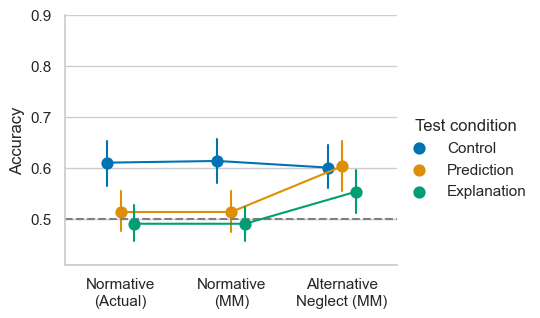

In [53]:
# alternative neglect for hard hidden trials (x = Hidden / Hidden AN)

# Load data
trials_PEC_path = '../outputs/all_trials_with_Ri.csv'
trials_PEC = pd.read_csv(trials_PEC_path)

# select only hard hidden trials
trials_PEC_HardHid = trials_PEC[(trials_PEC['fsm_type'] == 'hard') & (trials_PEC['trial_type'] == 'hidden')]

# drop all columns except participant_id, trial_number, test_condition, response_correct_mm, response_correct_mm_an
trials_PEC_HardHid = trials_PEC_HardHid[['participant_id', 'trial_number', 'test_condition', 'response_correct', 'response_correct_mm', 'response_correct_mm_an']]

# reformate data to long format with accuracy instead of response_correct_mm and response_correct_mm_an
trials_PEC_HardHid = trials_PEC_HardHid.melt(id_vars=['participant_id', 'trial_number', 'test_condition'], 
                                             value_vars=['response_correct', 'response_correct_mm', 'response_correct_mm_an'], 
                                             var_name='accuracy_type', value_name='accuracy')

# rename accuracy_type values to Normative and Alternative Neglect
trials_PEC_HardHid['accuracy_type'] = trials_PEC_HardHid['accuracy_type'].replace({'response_correct': 'Normative\n(Actual)', 'response_correct_mm': 'Normative\n(MM)', 'response_correct_mm_an': 'Alternative\nNeglect (MM)'})

# aggregate accuracy data for each participant and each trial type
aggregated_accuracy = trials_PEC_HardHid.groupby(['participant_id', 'test_condition', 'accuracy_type'])['accuracy'].mean().reset_index()

# rename test_condition
aggregated_accuracy['test_condition'] = aggregated_accuracy['test_condition'].replace({'prediction': 'Prediction', 'control': 'Control', 'explanation': 'Explanation'})

# order test_condition (Control, Prediction, Explanation)
aggregated_accuracy['test_condition'] = pd.Categorical(aggregated_accuracy['test_condition'], categories=['Control', 'Prediction', 'Explanation'], ordered=True)

# convert accuracy_type to categorical variable with ordered levels
aggregated_accuracy['accuracy_type'] = pd.Categorical(aggregated_accuracy['accuracy_type'], categories=['Normative\n(Actual)', 'Normative\n(MM)', 'Alternative\nNeglect (MM)'], ordered=True)

# plot mean accuracy and 95%CI for each test condition (hue) and accuracy type (x)
sns.set(style="whitegrid", font_scale=1) # set style and font size for all plots

g = sns.catplot(x="accuracy_type", y="accuracy", hue="test_condition", data=aggregated_accuracy, \
                kind="point", dodge=0.25, join=True, errorbar = ("ci", 95), palette="colorblind", height=3.5, aspect=1.3, legend=True)

# make line thiner
for ax in g.axes.flat:
    for line in ax.lines:
        line.set_linewidth(1.5)

# add dashed line at 0.5
for ax in g.axes.flat:
    ax.axhline(0.5, ls='--', color='gray')

g._legend.set_title('Test condition') # add legend title
g.set_titles("{col_name}") # add column titles
g.set_axis_labels("", "Accuracy") # add y-axis label
g.set(ylim=(0.41, 0.9)) # y axis limits 0.4 to 1


## Ri

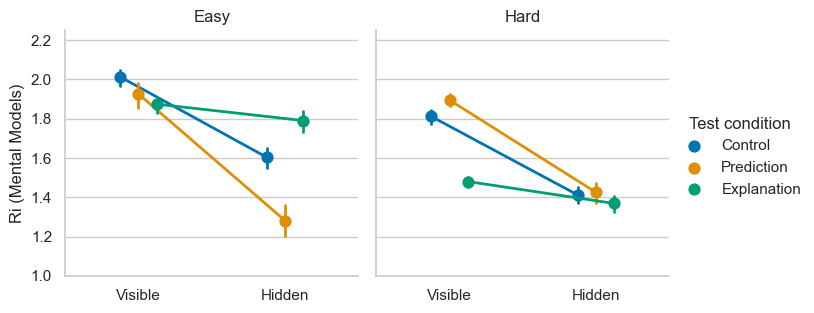

In [67]:
# mean Ri for each test_condition, trial_type, and fsm_type
# Load data
trials_PEC_path = '../outputs/all_trials_with_Ri.csv'
trials_PEC = pd.read_csv(trials_PEC_path)

# aggregate Ri data for each participant and each trial type
aggregated_Ri = trials_PEC.groupby(['participant_id', 'learning_condition', 
                                    'fsm_type', 'test_condition', 'trial_type'])['R_i_mm_eps_0.1'].mean().reset_index()

# rename easy to Easy and hard to Hard
aggregated_Ri['fsm_type'] = aggregated_Ri['fsm_type'].replace({'easy': 'Easy', 'hard': 'Hard'})

# rename test_condition and trial_type
aggregated_Ri['test_condition'] = aggregated_Ri['test_condition'].replace({'prediction': 'Prediction', 'control': 'Control', 'explanation': 'Explanation'})
aggregated_Ri['trial_type'] = aggregated_Ri['trial_type'].replace({'visible': 'Visible', 'hidden': 'Hidden'})

# order test_condition (Control, Prediction, Explanation),  trial_type (Visible, Hidden), fsm_type (Easy, Hard)
aggregated_Ri['test_condition'] = pd.Categorical(aggregated_Ri['test_condition'], categories=['Control', 'Prediction', 'Explanation'], ordered=True)
aggregated_Ri['trial_type'] = pd.Categorical(aggregated_Ri['trial_type'], categories=['Visible', 'Hidden'], ordered=True)
aggregated_Ri['fsm_type'] = pd.Categorical(aggregated_Ri['fsm_type'], categories=['Easy', 'Hard'], ordered=True)

# plot mean Ri and 95%CI for each test condition (hue) and trial type (x)
sns.set(style="whitegrid", font_scale=1) # set style and font size for all plots

g = sns.catplot(x="trial_type", y="R_i_mm_eps_0.1", hue="test_condition", col="fsm_type", data=aggregated_Ri, \
                kind="point", dodge=0.25, join=True, errorbar = ("ci", 95), palette="colorblind", height=3.5, aspect=1, legend=True)

# make line thiner
for ax in g.axes.flat:
    for line in ax.lines:
        line.set_linewidth(2)

# add dashed line at 0.5
for ax in g.axes.flat:
    ax.axhline(0.5, ls='--', color='gray')

g._legend.set_title('Test condition') # add legend title
g.set_titles("{col_name}") # add column titles
g.set_axis_labels("", "Ri (Mental Models)") # add y-axis label
g.set(ylim=(1, 2.25)) # y axis limits 0.4 to 1

# mean Ri
mean_Ri = aggregated_Ri['R_i_mm_eps_0.1'].mean()

## Predicted Accuracy

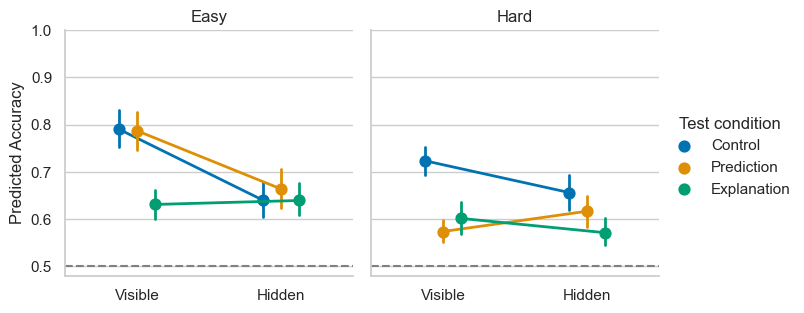

In [126]:
predicted_accuracy_path = '../outputs/predicted_accuracy.csv'
ss_betas = pd.read_csv(predicted_accuracy_path)

# Rename columns and labels
ss_betas = ss_betas.rename(columns={"task": "test_condition", 'condition':'trial_type'})

ss_betas["test_condition"] = ss_betas["test_condition"].replace({"prediction": "Prediction",
                                             "control": "Control",
                                             "explanation": "Explanation"})

ss_betas["fsm_type"] = ss_betas["fsm_type"].replace({"easy": "Easy", "hard": "Hard"})
ss_betas["fsm_type"] = pd.Categorical(ss_betas["fsm_type"], categories=["Easy", "Hard"], ordered=True)
ss_betas['test_condition'] = pd.Categorical(ss_betas['test_condition'], categories=['Control', 'Prediction', 'Explanation'], ordered=True)

# subset of visible and hidden trials
ss_betas = ss_betas[ss_betas["trial_type"].isin(["visible", "hidden"])]

ss_betas["trial_type"] = ss_betas["trial_type"].replace({"visible": "Visible", "hidden": "Hidden"})

# plot mean Ri and 95%CI for each test condition (hue) and trial type (x)
sns.set(style="whitegrid", font_scale=1) # set style and font size for all plots

g = sns.catplot(x="trial_type", y="predicted_accuracy", hue="test_condition", col="fsm_type", data=ss_betas, \
                kind="point", dodge=0.25, join=True, errorbar = ("ci", 95), palette="colorblind", height=3.5, aspect=1, legend=True)

# make line thiner
for ax in g.axes.flat:
    for line in ax.lines:
        line.set_linewidth(2)

# add dashed line at 0.5
for ax in g.axes.flat:
    ax.axhline(0.5, ls='--', color='gray')

g._legend.set_title('Test condition') # add legend title

g.set_titles("{col_name}") # add column titles

g.set_axis_labels("", "Predicted Accuracy") # add y-axis label

g.set(ylim=(0.48, 1)) # y axis limits 0.4 to 1

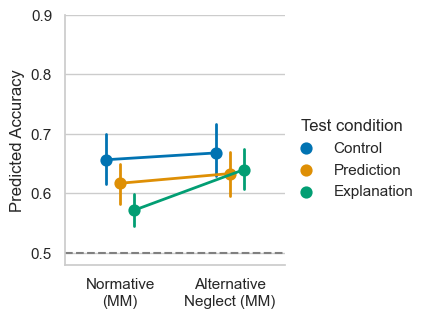

In [85]:
# alternative neglect plots for predicted accuracy
predicted_accuracy_path = '../outputs/predicted_accuracy.csv'
ss_betas = pd.read_csv(predicted_accuracy_path)

# Rename columns and labels
ss_betas = ss_betas.rename(columns={"task": "test_condition", 'condition':'trial_type'})

ss_betas["test_condition"] = ss_betas["test_condition"].replace({"prediction": "Prediction",
                                             "control": "Control",
                                             "explanation": "Explanation"})

ss_betas["fsm_type"] = ss_betas["fsm_type"].replace({"easy": "Easy", "hard": "Hard"})
ss_betas["fsm_type"] = pd.Categorical(ss_betas["fsm_type"], categories=["Easy", "Hard"], ordered=True)
ss_betas['test_condition'] = pd.Categorical(ss_betas['test_condition'], categories=['Control', 'Prediction', 'Explanation'], ordered=True)

# subset of hidden hard trials
ss_betas = ss_betas[(ss_betas["trial_type"].isin(["hidden", "hidden_an"])) & (ss_betas["fsm_type"] == "Hard")]

ss_betas["trial_type"] = ss_betas["trial_type"].replace({"hidden": "Normative\n(MM)", "hidden_an": "Alternative\nNeglect (MM)"})


# plot mean Ri and 95%CI for each test condition (hue) and trial type (x)

sns.set(style="whitegrid", font_scale=1) # set style and font size for all plots

g = sns.catplot(x="trial_type", y="predicted_accuracy", hue="test_condition", data=ss_betas, \
                kind="point", dodge=0.25, join=True, errorbar = ("ci", 95), palette="colorblind", height=3.5, aspect=1, legend=True)

# make line thiner
for ax in g.axes.flat:
    for line in ax.lines:
        line.set_linewidth(2)

# add dashed line at 0.5
for ax in g.axes.flat:
    ax.axhline(0.5, ls='--', color='gray')

g._legend.set_title('Test condition') # add legend title

g.set_axis_labels("", "Predicted Accuracy") # add y-axis label

g.set(ylim=(0.48, 0.9)) # y axis limits 0.4 to 1


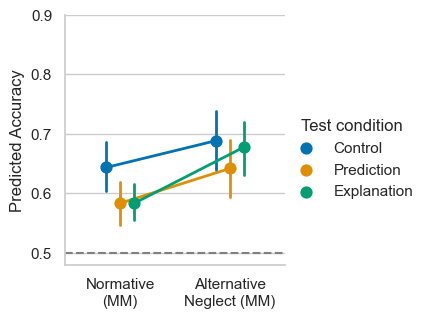

In [94]:
# alternative neglect plots for predicted accuracy (SUBSET OF TRIALS SENSIITIVE TO ALTERNATIVE NEGLECT)

predicted_accuracy_path = '../outputs/predicted_accuracy.csv'
ss_betas = pd.read_csv(predicted_accuracy_path)

# Rename columns and labels
ss_betas = ss_betas.rename(columns={"task": "test_condition", 'condition':'trial_type'})

ss_betas["test_condition"] = ss_betas["test_condition"].replace({"prediction": "Prediction",
                                             "control": "Control",
                                             "explanation": "Explanation"})

ss_betas["fsm_type"] = ss_betas["fsm_type"].replace({"easy": "Easy", "hard": "Hard"})
ss_betas["fsm_type"] = pd.Categorical(ss_betas["fsm_type"], categories=["Easy", "Hard"], ordered=True)
ss_betas['test_condition'] = pd.Categorical(ss_betas['test_condition'], categories=['Control', 'Prediction', 'Explanation'], ordered=True)

# subset of hidden hard trials
ss_betas = ss_betas[(ss_betas["trial_type"].isin(["hidden_normative_subset", "hidden_an_subset"])) & (ss_betas["fsm_type"] == "Hard")]

ss_betas["trial_type"] = ss_betas["trial_type"].replace({"hidden_normative_subset": "Normative\n(MM)", "hidden_an_subset": "Alternative\nNeglect (MM)"})

# plot mean Ri and 95%CI for each test condition (hue) and trial type (x)

sns.set(style="whitegrid", font_scale=1) # set style and font size for all plots

g = sns.catplot(x="trial_type", y="predicted_accuracy", hue="test_condition", data=ss_betas, \
                kind="point", dodge=0.25, join=True, errorbar = ("ci", 95), palette="colorblind", height=3.5, aspect=1, legend=True)

# make line thiner
for ax in g.axes.flat:
    for line in ax.lines:
        line.set_linewidth(2)

# add dashed line at 0.5
for ax in g.axes.flat:
    ax.axhline(0.5, ls='--', color='gray')

g._legend.set_title('Test condition') # add legend title

g.set_axis_labels("", "Predicted Accuracy") # add y-axis label

g.set(ylim=(0.48, 0.9)) # y axis limits 0.4 to 1


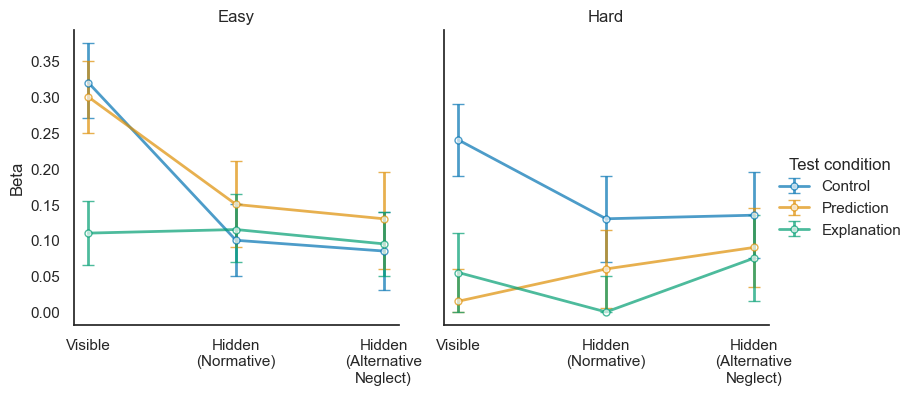

In [135]:
# plot beta and error bars
df = pd.read_csv('../outputs/beta_with_plus_minus_2LL_errors.csv')

# calculate error size error_low and error_high
df['error_low'] = df['beta_max'] - df['beta_lower']
df['error_high'] = df['beta_higher'] - df['beta_max']

# rename and order tasks
df['task'] = df['task'].replace({'prediction': 'Prediction', 'control': 'Control', 'explanation': 'Explanation'})

df['task'] = pd.Categorical(df['task'], categories=['Control', 'Prediction', 'Explanation'], ordered=True)

def plot_error_bars(x, y, yerr, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    yerr_values = data[yerr].values.T
    ax.errorbar(data[x], data[y], yerr=yerr_values, fmt='o', capsize=4, elinewidth=2, **kwargs)

sns.set(style="white", font_scale=1) # set style and font size for all plots

# plot mean beta with custom errors (plot_error_bars)
g = sns.FacetGrid(df, col='fsm_type', hue='task', height=4, aspect=1, palette="colorblind")

# Map the plot_error_bars function to the data (add white space between bars)
g.map_dataframe(plot_error_bars, x='condition', y='beta_max', yerr=['error_low', 'error_high'], ms=5, mew=1, mfc='white', ls='-', lw=2, alpha=0.7)

# add legend
g.add_legend()

# add legend title
g._legend.set_title('Test condition')

# add titles Easy and Hard for facets
titles = ['Easy', 'Hard']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

# add x values labels Visible, Hidden, Hidden\n(Alternative Neglect)
g.set_xticklabels(['Visible', 'Hidden\n(Normative)', 'Hidden\n(Alternative\nNeglect)'])

# add y axis label
g.set_axis_labels("", "Beta")